# Statistical Testing (Exercise)

In [116]:
import json
import numpy as np
import pandas as pd
import powerlaw
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
import math

In [104]:
business=[]
for l in open("../../yelp-dataset/business.json", encoding="utf8").readlines():
    business.append(json.loads(l))
df_business = pd.DataFrame.from_records(business)

FileNotFoundError: [Errno 2] No such file or directory: '../../yelp-dataset/business.json'

## Q1:
For all businesses, the number of reviews they get can differ a lot. We want to explore if the number of reviews (review_count) from all businesses have a power-law tail distribution. Please provide visualizations and reasonable explanations on how you draw your conclusions. If it is a power-law distribution, calculate the exponent alpha. If not, provide an explanation of the conclusion.

First we loaded the dataset from the json and caclulated the PDF of the review counts and graphed both the PDF and log scaled PDF of review counts for visual inspection 

In [ ]:
total_entries = df_business.shape[0]

review_value_counts = df_business['review_count'].value_counts().sort_index() 
review_value_percentages = review_value_counts.divide(total_entries)

print("PDF of Review Counts")
plt.plot(review_value_percentages)

In [ ]:
print("Log Scaled PDF of Review Counts")
plt.loglog(review_value_percentages)

Since the log scaled PDF function appears to be relatively linear, we are going to proceed to assume that this dataset follows the Power Law, but we still need to prove it. With visual inspection we can tell that there is a lot of noise in the dataset. In order to clean up the noise, we will bin the values

Binned PDF Review Counts


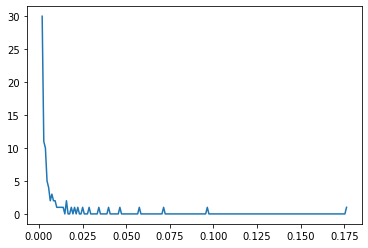

In [105]:
review_value_percentages = np.array(review_value_percentages)
counts, bins = np.histogram(review_value_percentages, bins = 190)

x_min_index = 2


bins=bins[x_min_index:]
counts = counts[x_min_index-1:]

print("Binned PDF Review Counts")
plt.plot(bins,counts)

Log Scaled Binned PDF Review Count


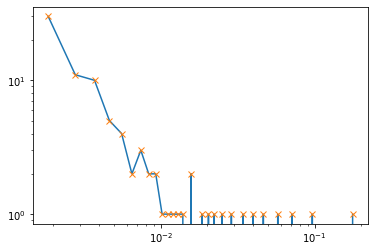

In [106]:
print("Log Scaled Binned PDF Review Count")
plt.plot(bins, counts)
plt.loglog(bins, counts, 'x')

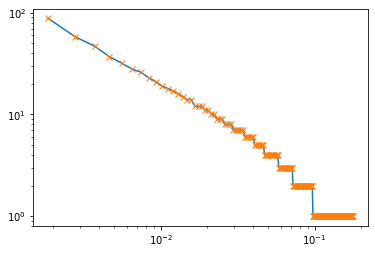

In [107]:
counts2 = counts[::-1]
counts2 = np.cumsum(counts2)
counts2 = counts2[::-1]

plt.figure()
plt.plot(bins, counts2)
plt.loglog(bins, counts2, 'x')

Now that we've reduced the noise of the dataset via binning, we will use the Pearsons Correlation Coefficient to determine how strongly linearly correlated the Log Scaled PDF is

In [108]:
bins_log = np.log(bins)
counts2_log = np.log(counts2)

corr, _ = pearsonr(bins_log, counts2_log)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.981


With a Pearsons Correlation Coefficient of '-0.981', we can conclude that the relationship is very strongly negatively correlated

In [109]:
data = counts2
results = powerlaw.Fit(data)
print("alpha =", results.power_law.alpha)
# print(results.power_law.xmin)

alpha = 2.372597590296026


Calculating best minimal value for power law fit


Using Python's powerlaw library, we fit a power law curve to our dataset and got an alpha = 2.372597590296026

## Q2:

We want to further look at the number of reviews for business geographically. In particular, we want to explore if the distribution of review_count follows the same distribution between Illinois and South Carolina. Use a suitable test for this task and provide detailed steps and explanations.

In [111]:
il_businesses = df_business.loc[df_business['state'] == 'IL']
il_review_counts = il_businesses['review_count'].value_counts().sort_index() 

sc_businesses = df_business.loc[df_business['state'] == 'SC']
sc_review_counts = sc_businesses['review_count'].value_counts().sort_index() 

In [122]:
ks_test_results = stats.ks_2samp(il_review_counts, sc_review_counts)

confidence_level = 0.05
c_alpha = math.sqrt(-0.5*math.log(confidence_level))
n = len(il_review_counts)
m = len(sc_review_counts)
RHS = c_alpha * math.sqrt((n+m)/(n*m))

print('D value', ks_test_results.statistic)
print('RHS of failure equation', RHS)
print('Does the test fail?', ks_test_results.statistic > RHS)
print('p-value', ks_test_results.pvalue)

D value 0.07002391708743025
RHS of failure equation 0.1570960396922789
Does the test fail? False
p-value 0.89929169890248
